**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 5. 로지스틱 회귀

## 5.1 정의

로지스틱 회귀는 종속 변수가 이산형일 때 수행할 수 있는 회귀 분석 기법으로 오즈를 모델링 한 것이다.

종속 변수가 연속형이 아닌 이산형이고, 모델링 자체를 확률에 관해 진행하므로 로지스틱 회귀는 분류에 사용된다.

만약 독립변수가 하나라면 공식은 다음과 같다.

$$\text{log} \dfrac{P(y=1)}{P(y=0)} = \text{log} \left( \dfrac{p}{1-p} \right) = ax + b$$

이 식을 정리하여 확률에 대해 나타내면 다음과 같다.

$$P(y=1) = p = \dfrac{1}{1+e^{-(ax + b)}}$$

위 식에서 $\dfrac{1}{1+e^{-x}}$ 형태의 함수식을 시그모이드 함수라고 한다.

시그모이드 함수는 0과 1사이의 값을 가진다.

## 5.2 오차 함수

로지스틱 회귀에서 만약 실제 값이 1인데 예측을 0에 가깝게 한다면 오차는 커질 것이다.

반대로 실제 값이 0인데 예측을 1에 가깝게 한다면 오차가 커질 것이다.

이를 반영한 오차 함수는 다음과 같다.

$$ - \dfrac{1}{n} \sum_{i}^n y_{i} \text{log}(p_{i}) + (1 - y_{i})\text{log}(1 - p_{i})$$

**[실제값이 1인 경우]**

실제 값이 1이면 $-\text{log}(p_{i})$ 형태가 되며 $p_{i}$가 클수록 작아진다.

$p_{i}$ 즉, 1로 예측할 확률이 1이라면 0이 될 것이다.

말 그대로 오차가 0이 된다.

**[실제값이 0인 경우]**

실제 값이 0이면 $\text{log}(1 - p_{i})$ 형태가 되며 $p_{i}$가 작을수록 작아진다.

$1 - p_{i}$ 즉, 0으로 예측할 확률이 1이고 1로 예측할 확률이 0이라면 0이 될 것이다.

## 5.3 참고사항

앞서 오차 함수에 대한 설명은 직관적으로 납득이 되고 이해가 된다.

그런데 정확하게 저 식이 어떻게 나왔을지 궁금하다.

이를 알아보기 위해 최대우도법에 대해 간략하게 정리하고자 한다.

교재에는 없는 내용이라 참고로 봐도 좋다.

### 5.3.1 최대우도법

만약 이미 관측된 데이터가 어떠한 분포에서 나왔다는 것까진 알고 있으나 모수를 모른다고 가정하자.

예를 들어, 베르누이 분포에서 관측된 값임을 알고 있다고 생각하자.

그렇다면 관측값들은 과연 어떤 베르누이 분포에서 나온 값일까?

다르게 말하면 베르누이 분포의 모수인 확률($p$)가 몇인 분포에서 나왔을까?

이 관측값들이 특정 모수에서 나왔을 가능도(우도)를 최대로 하는 모수를 찾는 방법이 최대우도법이다.

최대우도함수는 다음과 같다.

$$L(\theta) = \prod_{i}^n f(x_{i} | \theta)$$

$L(\theta)$를 최대화 시키는 모수 $\theta$는 $L(\theta)$의 로그를 씌운 함수도 최대화 시킨다.

(로그 함수는 단조 증가 함수이므로)

따라서 보통 계산의 편의를 위해 로그우도함수 $l(\theta)$를 사용한다.

$$l(\theta) = \text{log}L(\theta) = \sum_{i}^n \text{log}f(x_{i} | \theta)$$

이제 $l(\theta)$가 언제 최대값을 가지는지 알아야 한다.

이는 편미분을 통해 식이 0이 되는 점을 구하고 이때의 $\theta$가 최대우도추정량이다.

단순 선형 회귀에선 최소제곱법을 사용하지만 보통 일반화 선형 회귀 모형에선 최대우도법을 사용한다.

단순 선형 회귀에선 두 방법의 추정량이 같았던 것으로 기억한다.

(아마 회귀 계수 추정량은 같고 정규 분포 분산에 대한 추정량이 달랐을 것이다.)

### 5.3.2 로지스틱 회귀

로지스틱 회귀는 베르누이 분포를 가정하며 모수는 1로 나타날 확률 $p$이다.

베르누이 분포의 pmf는 다음과 같다.

$$P(Y=y) = p^{y}(1-p)^{1-y}$$

로그우도함수 $l(\theta)$는 다음과 같다.

$$l(\theta) = \sum_{i}^n \text{log}f(x_{i} | \theta) = \sum_{i}^n y_{i} \text{log}(p_{i}) + (1 - y_{i})\text{log}(1 - p_{i})$$


여기서, $p_{i} = \dfrac{1}{1+e^{-(ax_{i} + b)}}$이다.

로그우도함수에 $-\dfrac{1}{n}$ 을 곱하면 로지스틱 회귀 오차 함수가 나온다.

(이를 NLL: Negative log-likelihood라고 한다.)

즉, 최대우도법에 기반해서 로그우도함수를 최대화 하는 모수 $p$는 앞서 오차 함수를 최소화 할 것이다.

그리고 모수 $p$는 다시 모수 $a$와 $b$로 구성되어 있으므로 추정할 때 아까와 같은 식을 사용하는 것이다.

이제 이 식을 편미분해서 값을 구하면 되는데 정확하게 값이 떨어지지 않아 경사하강법을 사용한다.

## 5.4 경사하강법

In [3]:
# X: 공부시간, Y: 합격여부
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

# 기울기, 절편 초기화
a = 0
b = 0

# 학습률 설정
learning_rate = 0.05

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 반복 수 설정
epochs = 2001

# 로지스틱 회귀 경사하강법
for i in range(epochs):
    for x_data, y_data in data:
        
        # 파라미터 미분 값
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data) 
        b_diff = sigmoid(a*x_data + b) - y_data
        
        # 파라미터 업데이트
        a = a - learning_rate * a_diff
        b = b - learning_rate * b_diff
        
        if i % 1000 == 0:
            print(f"epoch: {i}, 기울기: {a:.2f}, 절편: {b:.2f}")

epoch: 0, 기울기: -0.05, 절편: -0.03
epoch: 0, 기울기: -0.14, 절편: -0.05
epoch: 0, 기울기: -0.23, 절편: -0.06
epoch: 0, 기울기: 0.12, 절편: -0.02
epoch: 0, 기울기: 0.24, 절편: -0.01
epoch: 0, 기울기: 0.27, 절편: -0.00
epoch: 0, 기울기: 0.29, 절편: -0.00
epoch: 1000, 기울기: 1.50, 절편: -9.94
epoch: 1000, 기울기: 1.49, 절편: -9.94
epoch: 1000, 기울기: 1.41, 절편: -9.95
epoch: 1000, 기울기: 1.49, 절편: -9.94
epoch: 1000, 기울기: 1.50, 절편: -9.94
epoch: 1000, 기울기: 1.50, 절편: -9.94
epoch: 1000, 기울기: 1.50, 절편: -9.94
epoch: 2000, 기울기: 1.91, 절편: -12.95
epoch: 2000, 기울기: 1.91, 절편: -12.95
epoch: 2000, 기울기: 1.85, 절편: -12.96
epoch: 2000, 기울기: 1.91, 절편: -12.95
epoch: 2000, 기울기: 1.91, 절편: -12.95
epoch: 2000, 기울기: 1.91, 절편: -12.95
epoch: 2000, 기울기: 1.91, 절편: -12.95


- 교재에 있는 로지스틱 회귀 경사하강법 코드이다.


- 각 파라미터별 편미분 공식은 구글링 해보니 풀이가 복잡해 그대로 사용하였다.


- 다만 이해가 안되는게 코드의 파라미터 업데이트를 데이터마다 진행한다는 점이다.


- 오차 함수를 봐도 미분하면 sum 형태로 나와야 할 것 같은데 어떤 이유인지 모르겠다.

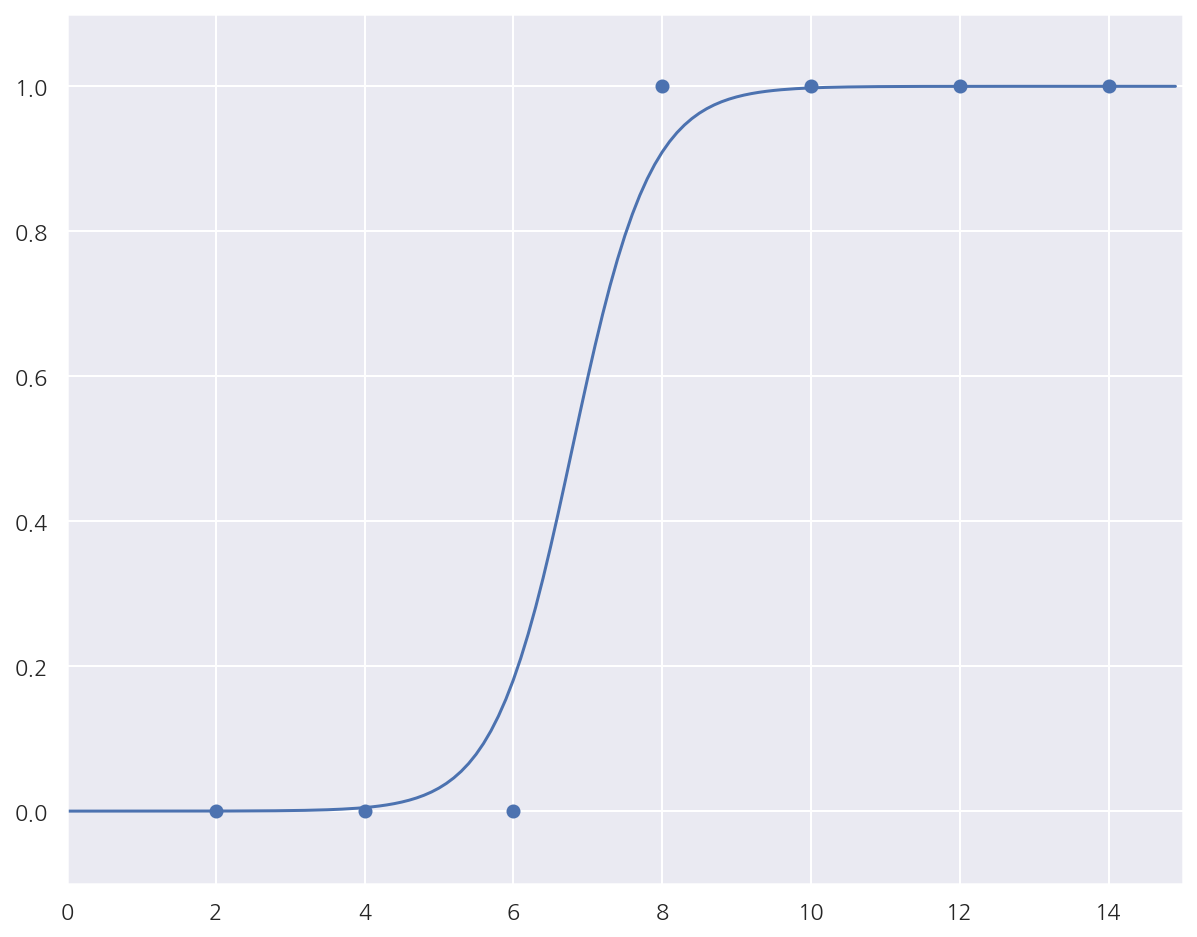

In [4]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

- 회귀선이랑 데이터는 어느정도 잘 맞는 것으로 보인다.

In [5]:
from sklearn.linear_model import LogisticRegression

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

x_data = np.array(x_data).reshape(-1,1)
y_data = np.array(y_data).reshape(-1,1)

lr = LogisticRegression()
lr.fit(x_data, y_data)
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)

기울기: [[0.96098298]]
절편: [-6.7245655]


- 비교를 위해서 사이킷런 로지스틱 회귀를 해보니 기울기 절편 차이가 많이 난다.

In [6]:
# X: 공부시간, Y: 합격여부
x_data = np.array([2,4,6,8,10,12,14])
y_data = np.array([0,0,0,1,1,1,1])

# 기울기, 절편 초기화
a = 0
b = 0

# 학습률 설정
learning_rate = 0.05

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 반복 수 설정
epochs = 2001

# 로지스틱 회귀 경사하강법
for i in range(epochs):
          
    # 파라미터 미분 값
    a_diff = np.mean(x_data*(sigmoid(a*x_data + b) - y_data))
    b_diff = np.mean(sigmoid(a*x_data + b) - y_data)

    # 파라미터 업데이트
    a = a - learning_rate * a_diff
    b = b - learning_rate * b_diff

    if i % 1000 == 0:
        print(f"epoch: {i}, 기울기: {a:.2f}, 절편: {b:.2f}")

epoch: 0, 기울기: 0.11, 절편: 0.00
epoch: 1000, 기울기: 0.62, 절편: -3.91
epoch: 2000, 기울기: 0.83, 절편: -5.52


- 파라미터 업데이트를 epoch마다로 수정하고 미분 값을 `np.mean()`으로 수정하였다.


- 앞서 사이킷런 결과랑은 여전히 조금 차이나지만 이전 결과에 비해 훨씬 가깝게 수렴하였다.

epoch=0, 기울기=0.1143, 절편=0.0036


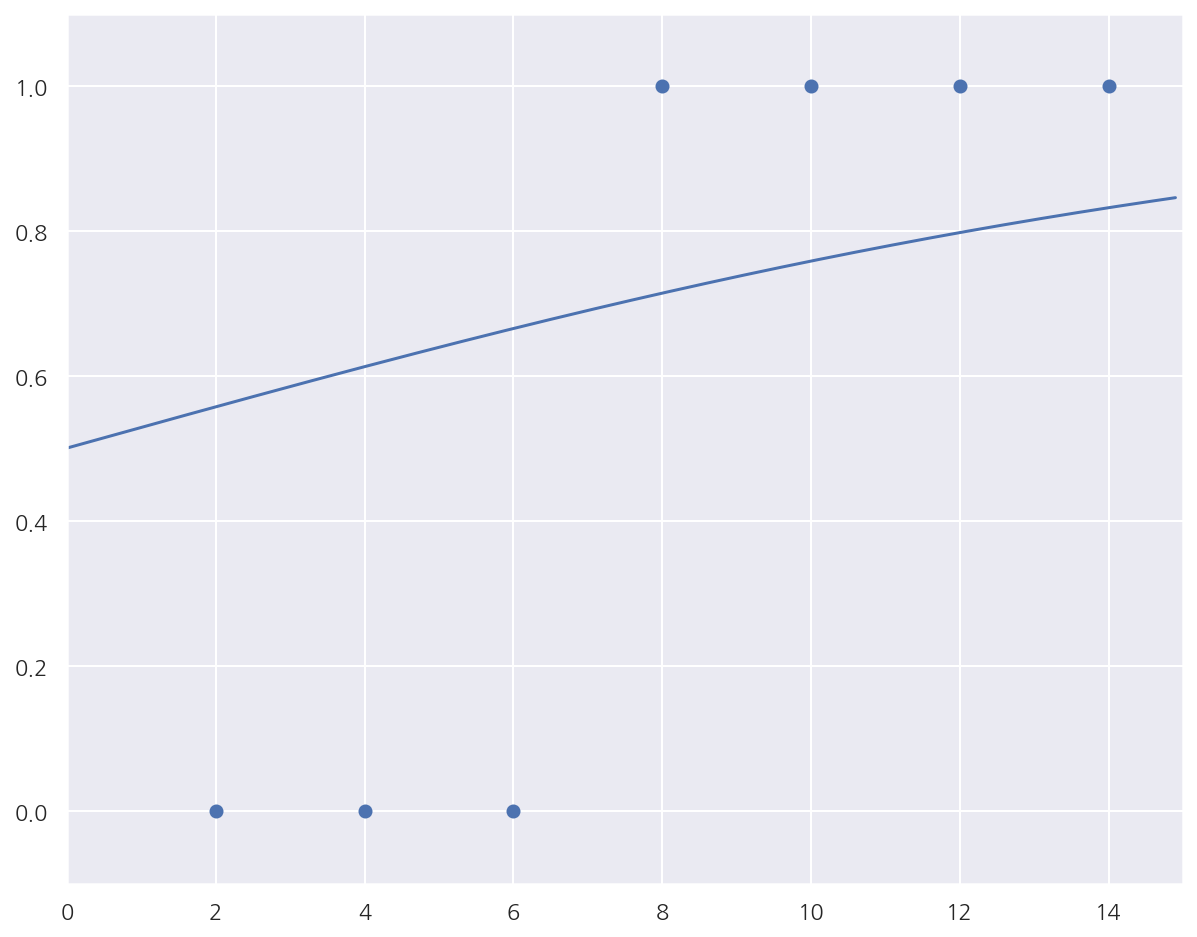

epoch=1000, 기울기=0.6151, 절편=-3.9134


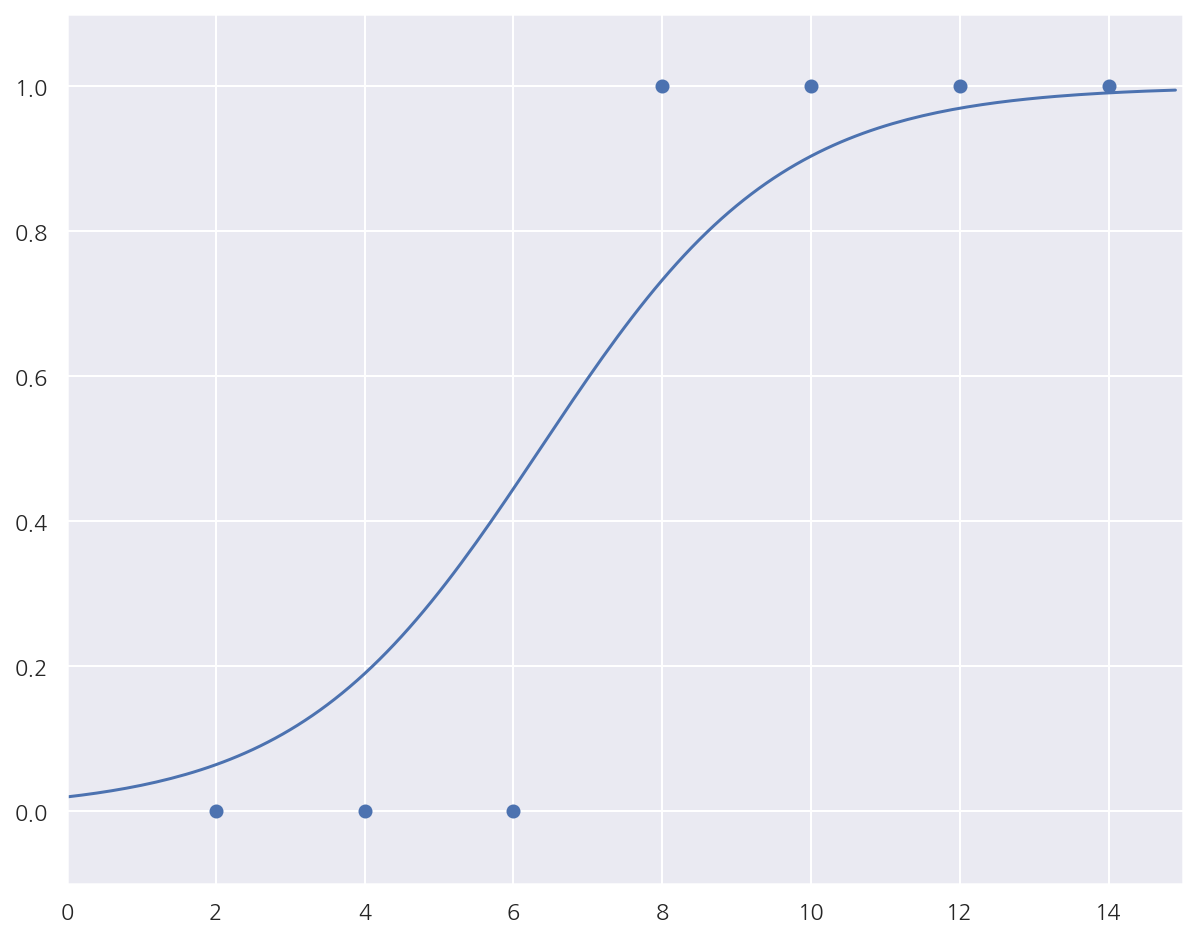

epoch=2000, 기울기=0.8313, 절편=-5.5174


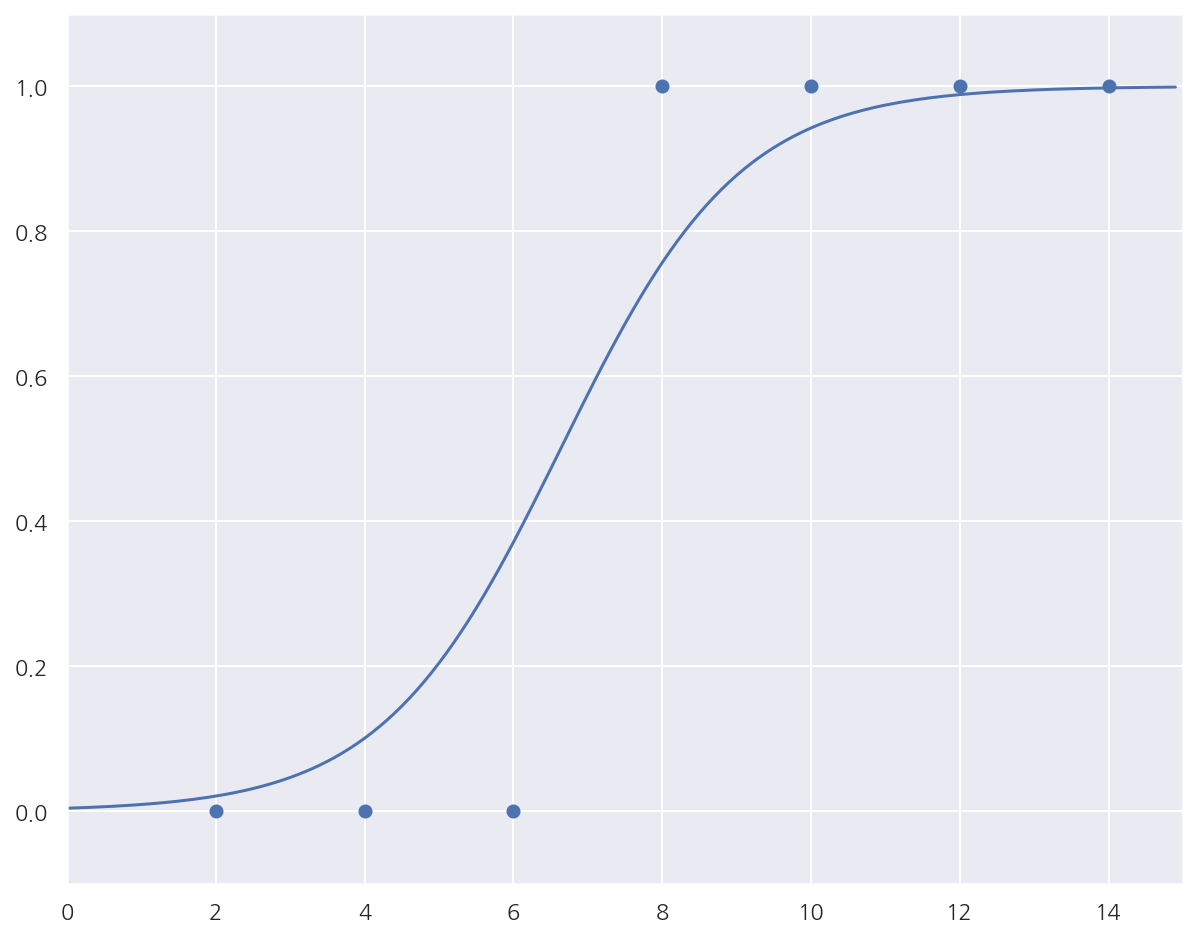

In [7]:
#UPDATE

#책의 코드는 각각의 x에 대한 기울기, 절편의 변화가 epoch마다 모두 출력 되어 이를 확인하게 끔 되어 있습니다.
#평균값을 구해 하나의 기울기와 절편을 출력하고, 1000 epoch마다 그래프를 그리면 다음과 같습니다.  

# 데이터 선언 
x = [i[0] for i in data]
y = [i[1] for i in data]
x_data = np.array(x)
y_data = np.array(y)

# 위에 계산된 a와 b의 값이 다시 사용되지 않기 위해 각각 0으로 초기화 합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.05 

#경사 하강법을 실행합니다.
for i in range(2001):
    a_diff = (1/len(x_data))*sum(x_data*(sigmoid(a*x_data + b) - y_data)) 
    b_diff = (1/len(x_data))*sum(sigmoid(a*x_data + b) - y_data)
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 1000 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        plt.scatter(x_data, y_data)
        plt.xlim(0, 15)
        plt.ylim(-.1, 1.1)
        x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
        plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
        plt.show()

- 최대한 소스코드를 안보려고 교재만 보고 했었는데 알고보니 소스코드 업데이트가 있었다..


- 구글링을 아무리 해도 이유를 몰랐는데 결과 자체는 내가 생각한 것과 동일해서 다행이다.


- 교재 코드는 데이터를 하나만 사용하는 확률적 경사하강법인 듯 하다.


- 이전에 머신러닝 완벽가이드에서 공부한 [경사하강법 포스팅](https://romg2.github.io/mlguide/07_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-05.-%ED%9A%8C%EA%B7%80-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95/)에 관련 내용을 정리했었다.